<a href="https://colab.research.google.com/github/Loki-10/VP-Detector/blob/master/Edge_Compute.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!git clone https://github.com/tensorflow/models/

Cloning into 'models'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 30991 (delta 0), reused 3 (delta 0), pack-reused 30988
Receiving objects: 100% (30991/30991), 510.59 MiB | 14.63 MiB/s, done.
Resolving deltas: 100% (19522/19522), done.
Checking out files: 100% (3055/3055), done.


In [44]:
!pip install pillow
!pip install lxml
!pip install Cython
!pip install jupyter
!pip install matplotlib
!pip install pandas
!pip install utils
!pip install opencv-python
!pip install tensorflow-gpu
!apt-get install -qq protobuf-compiler python-tk
!pip install -q Cython contextlib2 pillow lxml matplotlib PyDrive
!pip install -q pycocotools

In [45]:
!pip install tensorflow-gpu==1.14.0
!pip install tensorboard==1.14.0
!pip install tensorflow-estimator==1.14.0

In [46]:
%cd /content/models/research

/content/models/research


In [0]:
!protoc object_detection/protos/*.proto --python_out=.

In [0]:
import os
os.environ['PYTHONPATH'] += ':/content/models/research/:/content/models/research/slim/'

In [49]:
!python3 setup.py build
!python3 setup.py install

running build
running build_py
copying object_detection/protos/input_reader_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/post_processing_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/faster_rcnn_box_coder_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/region_similarity_calculator_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/losses_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/argmax_matcher_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/graph_rewriter_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/keypoint_box_coder_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/string_int_label_map_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/multiscale_anchor_generator_pb2.py -> build/lib/object_detection/protos
copying object_detection

In [50]:
%cd /

/


In [11]:
!cp -avr /content/drive/My\ Drive/object-detection /content

'/content/drive/My Drive/object-detection' -> '/content/object-detection'
'/content/drive/My Drive/object-detection/data' -> '/content/object-detection/data'
'/content/drive/My Drive/object-detection/data/test_labels.csv' -> '/content/object-detection/data/test_labels.csv'
'/content/drive/My Drive/object-detection/data/train_labels.csv' -> '/content/object-detection/data/train_labels.csv'
'/content/drive/My Drive/object-detection/images' -> '/content/object-detection/images'
'/content/drive/My Drive/object-detection/images/train' -> '/content/object-detection/images/train'
'/content/drive/My Drive/object-detection/images/train/1.jpg' -> '/content/object-detection/images/train/1.jpg'
'/content/drive/My Drive/object-detection/images/train/10.jpg' -> '/content/object-detection/images/train/10.jpg'
'/content/drive/My Drive/object-detection/images/train/1.xml' -> '/content/object-detection/images/train/1.xml'
'/content/drive/My Drive/object-detection/images/train/10.xml' -> '/content/object

In [12]:
 %cd /content/object-detection

/content/object-detection


In [13]:
!python3 generate_tfrecord.py --csv_input=data/train_labels.csv --output_path=data/train.record --image_dir=images/train


/content/object-detection

W1001 16:08:52.440207 140667480524672 deprecation_wrapper.py:119] From generate_tfrecord.py:111: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.


W1001 16:08:52.523999 140667480524672 deprecation_wrapper.py:119] From generate_tfrecord.py:69: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

Successfully created the TFRecords: /content/object-detection/data/train.record


In [14]:
!python3 generate_tfrecord.py --csv_input=data/test_labels.csv --output_path=data/test.record --image_dir=images/test


/content/object-detection

W1001 16:09:01.213825 140544686655360 deprecation_wrapper.py:119] From generate_tfrecord.py:111: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.


W1001 16:09:01.254439 140544686655360 deprecation_wrapper.py:119] From generate_tfrecord.py:69: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

Successfully created the TFRecords: /content/object-detection/data/test.record


In [15]:
!wget http://download.tensorflow.org/models/object_detection/faster_rcnn_inception_v2_coco_2018_01_28.tar.gz

--2019-10-01 16:09:09--  http://download.tensorflow.org/models/object_detection/faster_rcnn_inception_v2_coco_2018_01_28.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.203.128, 2404:6800:4008:c03::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.203.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149119618 (142M) [application/x-tar]
Saving to: ‘faster_rcnn_inception_v2_coco_2018_01_28.tar.gz’

faster_rcnn_incepti 100%[===================>] 142.21M  71.2MB/s    in 2.0s    

2019-10-01 16:09:12 (71.2 MB/s) - ‘faster_rcnn_inception_v2_coco_2018_01_28.tar.gz’ saved [149119618/149119618]



In [16]:
!tar -xvzf faster_rcnn_inception_v2_coco_2018_01_28.tar.gz

faster_rcnn_inception_v2_coco_2018_01_28/
faster_rcnn_inception_v2_coco_2018_01_28/model.ckpt.index
faster_rcnn_inception_v2_coco_2018_01_28/checkpoint
faster_rcnn_inception_v2_coco_2018_01_28/pipeline.config
faster_rcnn_inception_v2_coco_2018_01_28/model.ckpt.data-00000-of-00001
faster_rcnn_inception_v2_coco_2018_01_28/model.ckpt.meta
faster_rcnn_inception_v2_coco_2018_01_28/saved_model/
faster_rcnn_inception_v2_coco_2018_01_28/saved_model/saved_model.pb
faster_rcnn_inception_v2_coco_2018_01_28/saved_model/variables/
faster_rcnn_inception_v2_coco_2018_01_28/frozen_inference_graph.pb


In [17]:
!cp -avr /content/object-detection/data /content/models/research/object_detection

'/content/object-detection/data/test_labels.csv' -> '/content/models/research/object_detection/data/test_labels.csv'
'/content/object-detection/data/train_labels.csv' -> '/content/models/research/object_detection/data/train_labels.csv'
'/content/object-detection/data/test.record' -> '/content/models/research/object_detection/data/test.record'


In [19]:
!cp -avr /content/object-detection/images /content/models/research/object_detection

'/content/object-detection/images' -> '/content/models/research/object_detection/images'
'/content/object-detection/images/train' -> '/content/models/research/object_detection/images/train'
'/content/object-detection/images/train/1.jpg' -> '/content/models/research/object_detection/images/train/1.jpg'
'/content/object-detection/images/train/10.jpg' -> '/content/models/research/object_detection/images/train/10.jpg'
'/content/object-detection/images/train/1.xml' -> '/content/models/research/object_detection/images/train/1.xml'
'/content/object-detection/images/train/10.xml' -> '/content/models/research/object_detection/images/train/10.xml'
'/content/object-detection/images/train/100.jpg' -> '/content/models/research/object_detection/images/train/100.jpg'
'/content/object-detection/images/train/100.xml' -> '/content/models/research/object_detection/images/train/100.xml'
'/content/object-detection/images/train/103.jpg' -> '/content/models/research/object_detection/images/train/103.jpg'
'/c

In [20]:
!cp -avr /content/object-detection/faster_rcnn_inception_v2_coco_2018_01_28 /content/models/research/object_detection

'/content/object-detection/faster_rcnn_inception_v2_coco_2018_01_28' -> '/content/models/research/object_detection/faster_rcnn_inception_v2_coco_2018_01_28'
'/content/object-detection/faster_rcnn_inception_v2_coco_2018_01_28/model.ckpt.index' -> '/content/models/research/object_detection/faster_rcnn_inception_v2_coco_2018_01_28/model.ckpt.index'
'/content/object-detection/faster_rcnn_inception_v2_coco_2018_01_28/checkpoint' -> '/content/models/research/object_detection/faster_rcnn_inception_v2_coco_2018_01_28/checkpoint'
'/content/object-detection/faster_rcnn_inception_v2_coco_2018_01_28/pipeline.config' -> '/content/models/research/object_detection/faster_rcnn_inception_v2_coco_2018_01_28/pipeline.config'
'/content/object-detection/faster_rcnn_inception_v2_coco_2018_01_28/model.ckpt.data-00000-of-00001' -> '/content/models/research/object_detection/faster_rcnn_inception_v2_coco_2018_01_28/model.ckpt.data-00000-of-00001'
'/content/object-detection/faster_rcnn_inception_v2_coco_2018_01_

In [24]:
!cp -avr /content/drive/My\ Drive/training /content/models/research/object_detection

'/content/drive/My Drive/training' -> '/content/models/research/object_detection/training'
'/content/drive/My Drive/training/faster_rcnn_inception_v2_coco.config' -> '/content/models/research/object_detection/training/faster_rcnn_inception_v2_coco.config'
'/content/drive/My Drive/training/.ipynb_checkpoints' -> '/content/models/research/object_detection/training/.ipynb_checkpoints'
'/content/drive/My Drive/training/pipeline.config' -> '/content/models/research/object_detection/training/pipeline.config'
'/content/drive/My Drive/training/graph.pbtxt' -> '/content/models/research/object_detection/training/graph.pbtxt'
'/content/drive/My Drive/training/model.ckpt-14361.index' -> '/content/models/research/object_detection/training/model.ckpt-14361.index'
'/content/drive/My Drive/training/model.ckpt-14361.data-00000-of-00001' -> '/content/models/research/object_detection/training/model.ckpt-14361.data-00000-of-00001'
'/content/drive/My Drive/training/model.ckpt-14361.meta' -> '/content/model

In [51]:
%cd /content/models/research/object_detection

/content/models/research/object_detection


In [52]:
!python3 export_inference_graph.py \
    --input_type image_tensor \
    --pipeline_config_path training/faster_rcnn_inception_v2_coco.config \
    --trained_checkpoint_prefix training/model.ckpt-21602\
    --output_directory edge_compute_model





W1001 16:23:36.372486 140245840054144 deprecation_wrapper.py:119] From export_inference_graph.py:145: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.


W1001 16:23:36.380342 140245840054144 deprecation_wrapper.py:119] From /content/models/research/object_detection/exporter.py:381: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.


W1001 16:23:36.380596 140245840054144 deprecation_wrapper.py:119] From /content/models/research/object_detection/exporter.py:113: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.


W1001 16:23:36.436561 140245840054144 deprecation_wrapper.py:119] From /content/models/research/object_detection/core/preprocessor.py:2412: The name tf.image.resize_images is deprecated. Please use tf.image.resize instead.


W1001 16:23:36.503036 140245840054144 deprecation_wrapper.py:119] From /content/models/research/object_detection/meta_architectures/faster_rcnn_meta_arch.py:16

In [0]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

if StrictVersion(tf.__version__) < StrictVersion('1.12.0'):
  raise ImportError('Please upgrade your TensorFlow installation to v1.12.*.')

In [0]:
%matplotlib inline

In [0]:
from utils import label_map_util
from utils import visualization_utils as vis_util

In [0]:
MODEL_NAME = 'edge_compute_model'
PATH_TO_FROZEN_GRAPH = MODEL_NAME + '/frozen_inference_graph.pb'
PATH_TO_LABELS = os.path.join('training', 'object-detection.pbtxt')

In [0]:
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

In [0]:
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

In [0]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [0]:
PATH_TO_TEST_IMAGES_DIR = 'test_images'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, '{}.jpg'.format(i)) for i in range(1, 6) ]
# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

In [0]:
def run_inference_for_single_image(image, graph):
  with graph.as_default():
    with tf.Session() as sess:
      # Get handles to input and output tensors
      ops = tf.get_default_graph().get_operations()
      all_tensor_names = {output.name for op in ops for output in op.outputs}
      tensor_dict = {}
      for key in [
          'num_detections', 'detection_boxes', 'detection_scores',
          'detection_classes', 'detection_masks'
      ]:
        tensor_name = key + ':0'
        if tensor_name in all_tensor_names:
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
              tensor_name)
      if 'detection_masks' in tensor_dict:
        # The following processing is only for single image
        detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
        detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
        # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
        real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
        detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
        detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes, image.shape[1], image.shape[2])
        detection_masks_reframed = tf.cast(
            tf.greater(detection_masks_reframed, 0.5), tf.uint8)
        # Follow the convention by adding back the batch dimension
        tensor_dict['detection_masks'] = tf.expand_dims(
            detection_masks_reframed, 0)
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

      # Run inference
      output_dict = sess.run(tensor_dict,
                             feed_dict={image_tensor: image})

      # all outputs are float32 numpy arrays, so convert types as appropriate
      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict[
          'detection_classes'][0].astype(np.int64)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
      if 'detection_masks' in output_dict:
        output_dict['detection_masks'] = output_dict['detection_masks'][0]
  return output_dict

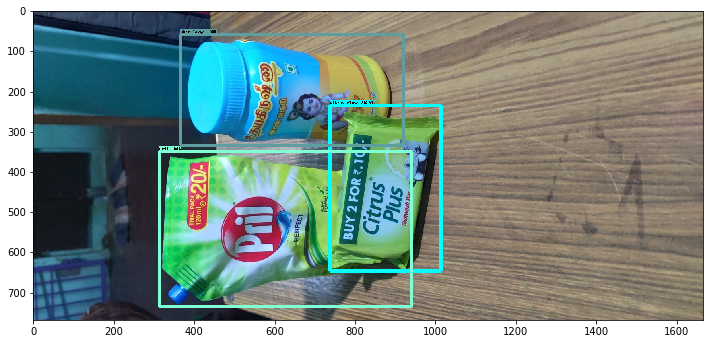

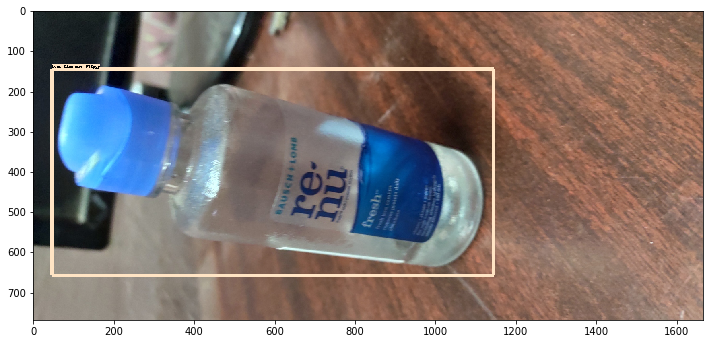

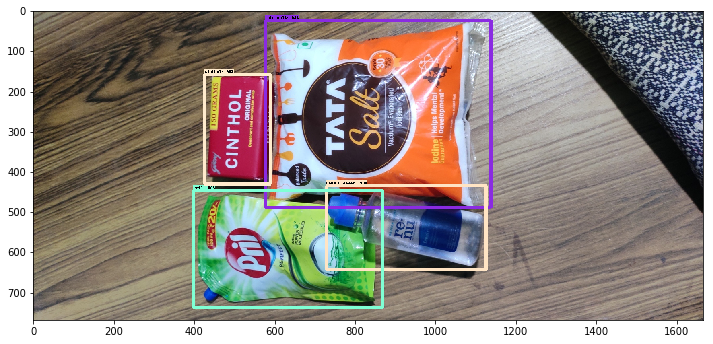

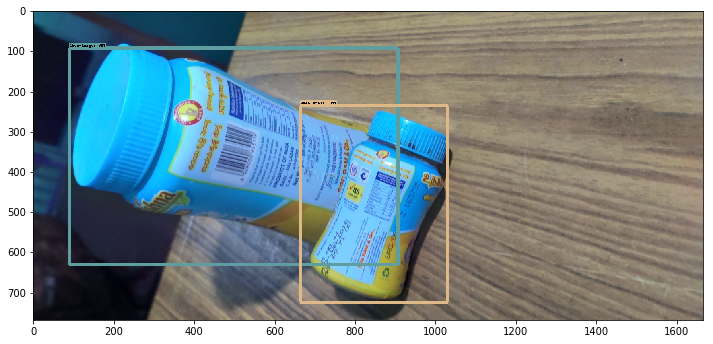

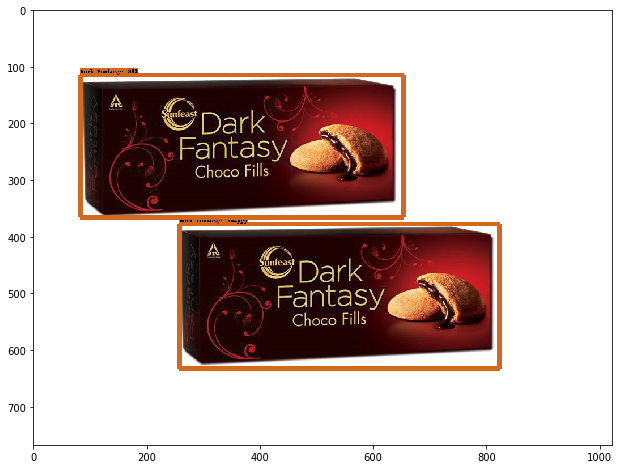

In [66]:
for image_path in TEST_IMAGE_PATHS:
  image = Image.open(image_path)
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = load_image_into_numpy_array(image)
  # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
  image_np_expanded = np.expand_dims(image_np, axis=0)
  # Actual detection.
  output_dict = run_inference_for_single_image(image_np_expanded, detection_graph)
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks'),
      use_normalized_coordinates=True,
      line_thickness=8)
  plt.figure(figsize=IMAGE_SIZE)
  plt.imshow(image_np)